In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load dataset
file_path = "/content/final_8k_edu.csv"  # Change to your file path
df = pd.read_csv(file_path)

<ipython-input-6-bc9a5994af76>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=granular_counts.index, y=granular_counts.values, palette="Oranges")


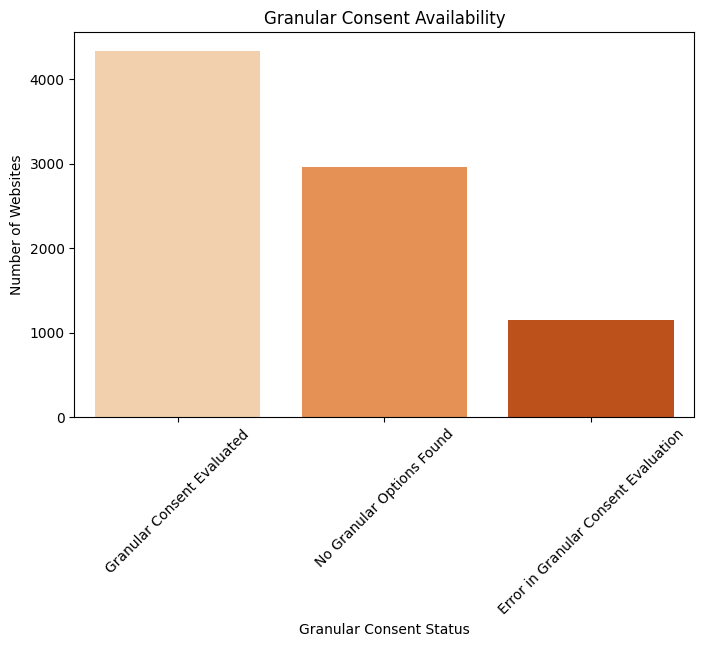

,Granular Consent Status,Number of Websites
0,Granular Consent Evaluated,4338
1,No Granular Options Found,2960
2,Error in Granular Consent Evaluation,1156


In [6]:


# 1. Granular Consent Availability
granular_counts = df["Granular Consent Status"].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=granular_counts.index, y=granular_counts.values, palette="Oranges")
plt.xlabel("Granular Consent Status")
plt.ylabel("Number of Websites")
plt.title("Granular Consent Availability")
plt.xticks(rotation=45)
plt.show()

# Display table
granular_table = granular_counts.reset_index()
granular_table.columns = ["Granular Consent Status", "Number of Websites"]
display(granular_table)


<ipython-input-7-1662f2d6ac6e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compliance_counts.index, y=compliance_counts.values, palette="Blues")


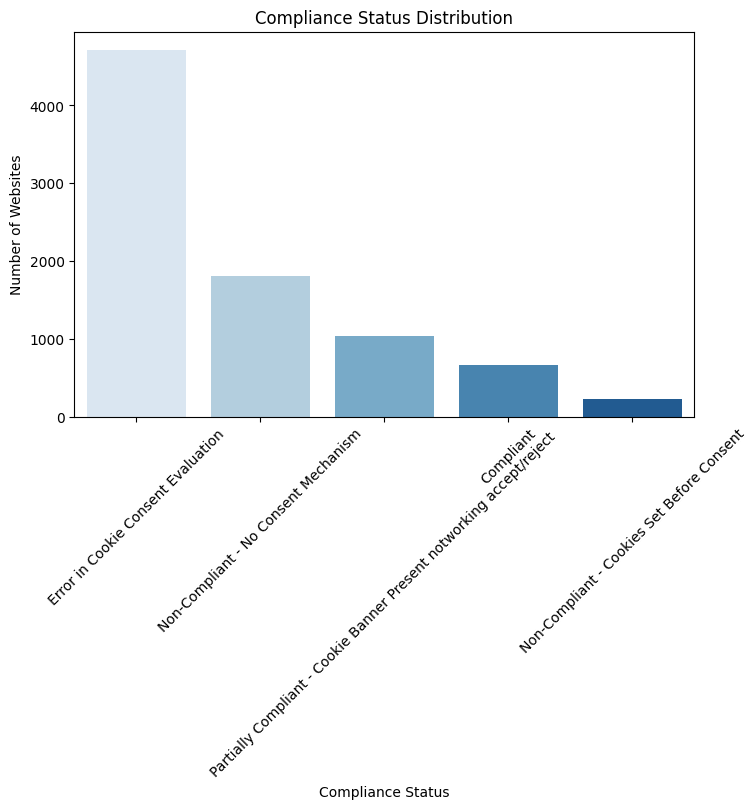

,Compliance Status,Number of Websites
0,Error in Cookie Consent Evaluation,4713
1,Non-Compliant - No Consent Mechanism,1811
2,Partially Compliant - Cookie Banner Present no...,1038
3,Compliant,665
4,Non-Compliant - Cookies Set Before Consent,227


In [7]:
# 2. Compliance Status Distribution
compliance_counts = df["Compliance Status"].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=compliance_counts.index, y=compliance_counts.values, palette="Blues")
plt.xlabel("Compliance Status")
plt.ylabel("Number of Websites")
plt.title("Compliance Status Distribution")
plt.xticks(rotation=45)
plt.show()

# Display table
compliance_table = compliance_counts.reset_index()
compliance_table.columns = ["Compliance Status", "Number of Websites"]
display(compliance_table)


<ipython-input-8-d3e9ccdb420b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cookie_behavior.index, y=cookie_behavior.values, palette="Purples")


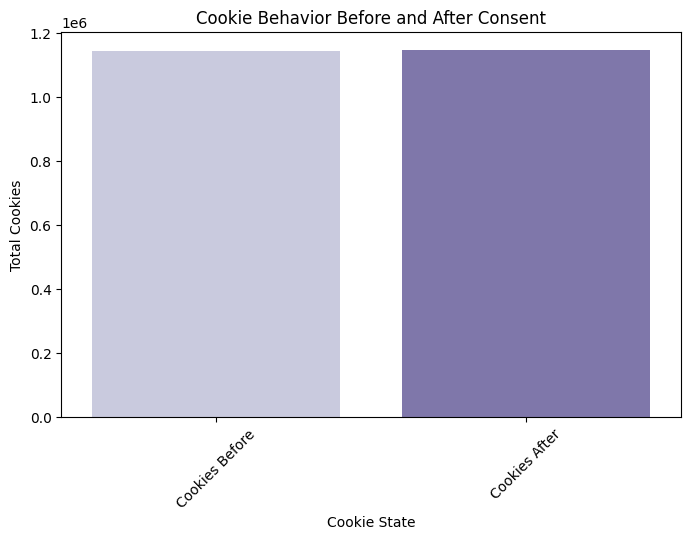

,Cookie State,Total Cookies
0,Cookies Before,1145005
1,Cookies After,1146373


In [8]:
# 3. Cookie Behavior Analysis
cookie_behavior = df[["Cookies Before", "Cookies After"]].sum()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=cookie_behavior.index, y=cookie_behavior.values, palette="Purples")
plt.xlabel("Cookie State")
plt.ylabel("Total Cookies")
plt.title("Cookie Behavior Before and After Consent")
plt.xticks(rotation=45)
plt.show()

# Display table
cookie_behavior_table = cookie_behavior.reset_index()
cookie_behavior_table.columns = ["Cookie State", "Total Cookies"]
display(cookie_behavior_table)


<Figure size 1000x600 with 0 Axes>

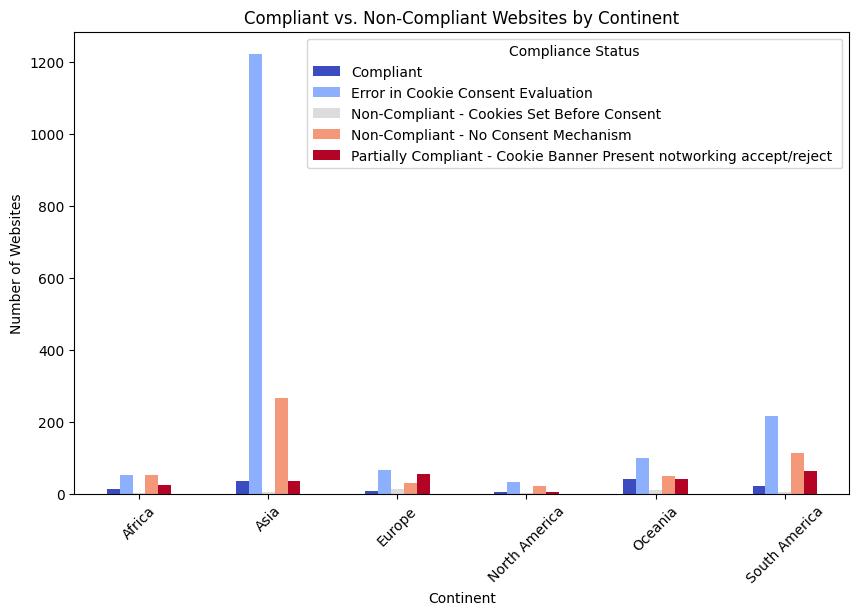

Compliance Status,Compliant,Error in Cookie Consent Evaluation,Non-Compliant - Cookies Set Before Consent,Non-Compliant - No Consent Mechanism,Partially Compliant - Cookie Banner Present notworking accept/reject
Continent,,,,,
Africa,12,53,2,52,23
Asia,35,1224,4,266,35
Europe,8,66,14,30,56
North America,4,33,2,21,4
Oceania,42,99,10,48,42
South America,22,216,6,114,63


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display

# Load dataset
file_path = "/content/final_8k_edu.csv"  # Replace with your actual file
df = pd.read_csv(file_path)

# Function to extract country code from URL
def extract_country(url):
    match = re.search(r"\.([a-z]{2})\/?$", url)  # Match last part of domain
    if match:
        return match.group(1).lower()  # Extract country code
    return "unknown"

# Apply the function to create a new column
df["Country Code"] = df["Website"].apply(extract_country)

# **Mapping Country Code to Continent**
continent_map = {
    "jo": "Asia", "sa": "Asia", "ae": "Asia", "cn": "Asia", "jp": "Asia", "in": "Asia", "id": "Asia", "my": "Asia",
    "us": "North America", "ca": "North America", "mx": "North America",
    "uk": "Europe", "de": "Europe", "fr": "Europe", "it": "Europe", "es": "Europe", "nl": "Europe", "pl": "Europe",
    "br": "South America", "ar": "South America", "cl": "South America", "co": "South America",
    "au": "Oceania", "nz": "Oceania",
    "za": "Africa", "ng": "Africa", "eg": "Africa",
}

# Assign Continent based on country code
df["Continent"] = df["Country Code"].map(continent_map).fillna("Unknown")

# **Filter out "Unknown" (if needed)**
df_filtered = df[df["Continent"] != "Unknown"]

# **Count compliance by continent**
compliance_by_continent = df_filtered.groupby("Continent")["Compliance Status"].value_counts().unstack()

# **Plot bar chart**
plt.figure(figsize=(10,6))
compliance_by_continent.plot(kind="bar", colormap="coolwarm", figsize=(10,6))
plt.xlabel("Continent")
plt.ylabel("Number of Websites")
plt.title("Compliant vs. Non-Compliant Websites by Continent")
plt.xticks(rotation=45)
plt.legend(title="Compliance Status")
plt.show()

# **Display table**
display(compliance_by_continent)


In [10]:
from google.colab import files

# Define the output file path
output_file = "final_8k_edu_with_continents.csv"

# Save the updated dataset
df.to_csv(output_file, index=False)

# Provide a download link
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

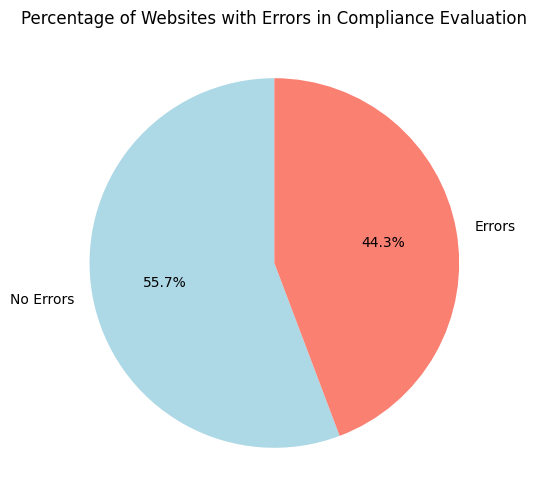

In [11]:
# Count occurrences of errors
error_counts = df["Compliance Status"].str.contains("Error", na=False).value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(error_counts, labels=["No Errors", "Errors"], autopct='%1.1f%%', colors=["lightblue", "salmon"], startangle=90)
plt.title("Percentage of Websites with Errors in Compliance Evaluation")
plt.show()
